### The paths don't work because everything was moved but the code is correct

In [27]:
from lightkurve import search_targetpixelfile, search

import matplotlib.pyplot as plt
%matplotlib inline

from altaipony.flarelc import FlareLightCurve

import os
import copy

import numpy as np
import pandas as pd

from funcs.custom_detrending import custom_detrending, iteratively_remove_sines
from funcs.funcs import read_custom_aperture_lc

import astropy.units as u

from scipy import optimize

CWD = "/".join(os.getcwd().split("/")[:-2])


In [6]:
import lightkurve
lightkurve.__version__

'1.5.2'

# Create a light curve mosaic from individual pixel light curves

In [45]:
TIC = 237880881
c = 1

In [46]:
# if you need to create the tiles first, you have to do it manually
tpfl = search_targetpixelfile(f"TIC {TIC}", sector=c, cadence="short")
tpf = tpfl.download_all()

10% (1972/20076) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
10% (1972/20076) of the cadences will be ignored due to the quality mask (quality_bitmask=175).


In [54]:
tpfl[0].ra[0],
tpfl[0].dec[0]


SyntaxError: invalid syntax (<ipython-input-54-da418d05df4c>, line 1)

In [51]:
tpf[0][4000:6000,].interact(notebook_url='http://0.0.0.0:8080')

0% (0/2000) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
0% (0/2000) of the cadences will be ignored due to the quality mask (quality_bitmask=175).


Starting Bokeh server version 1.3.4 (running on Tornado 6.0.3)


200 GET /autoload.js?bokeh-autoload-element=14303&bokeh-absolute-url=http://0.0.0.0:38659&resources=none (127.0.0.1) 310.49ms
101 GET /ws?bokeh-protocol-version=1.0&bokeh-session-id=FEAKNPvJMQsuIyr06BF2nkvTyDHqF9nW6pzio2aTzouK (127.0.0.1) 1.39ms
WebSocket connection opened
ServerConnection created


In [24]:
paths = ! ls /work1/eilin/MultiperiodFlares/MalachiteMountains/data/lcs/single_pixel_lcs/*10000*
paths

['/work1/eilin/MultiperiodFlares/MalachiteMountains/data/lcs/single_pixel_lcs/00_Kepler_100004076_custom-lc.fits',
 '/work1/eilin/MultiperiodFlares/MalachiteMountains/data/lcs/single_pixel_lcs/01_Kepler_100004076_custom-lc.fits',
 '/work1/eilin/MultiperiodFlares/MalachiteMountains/data/lcs/single_pixel_lcs/02_Kepler_100004076_custom-lc.fits',
 '/work1/eilin/MultiperiodFlares/MalachiteMountains/data/lcs/single_pixel_lcs/03_Kepler_100004076_custom-lc.fits',
 '/work1/eilin/MultiperiodFlares/MalachiteMountains/data/lcs/single_pixel_lcs/10_Kepler_100004076_custom-lc.fits',
 '/work1/eilin/MultiperiodFlares/MalachiteMountains/data/lcs/single_pixel_lcs/11_Kepler_100004076_custom-lc.fits',
 '/work1/eilin/MultiperiodFlares/MalachiteMountains/data/lcs/single_pixel_lcs/12_Kepler_100004076_custom-lc.fits',
 '/work1/eilin/MultiperiodFlares/MalachiteMountains/data/lcs/single_pixel_lcs/13_Kepler_100004076_custom-lc.fits',
 '/work1/eilin/MultiperiodFlares/MalachiteMountains/data/lcs/single_pixel_lcs/20

0% (0/4000) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
0% (0/4000) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
/work1/eilin/Flares_in_Clusters_2/RESULTS_Github/flares-in-clusters-with-k2-ii/flaresinclustersii/lib64/python3.6/site-packages/ipykernel_launcher.py:8: ResourceWarning: unclosed file <_io.FileIO name='/work1/eilin/MultiperiodFlares/MalachiteMountains/data/lcs/single_pixel_lcs/00_Kepler_100004076_custom-lc.fits' mode='rb' closefd=True>
  
0% (0/4000) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
0% (0/4000) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
/work1/eilin/Flares_in_Clusters_2/RESULTS_Github/flares-in-clusters-with-k2-ii/flaresinclustersii/lib64/python3.6/site-packages/ipykernel_launcher.py:8: ResourceWarning: unclosed file <_io.FileIO name='/work1/eilin/MultiperiodFlares/MalachiteMountains/data/lcs/single_pixel_lcs/0

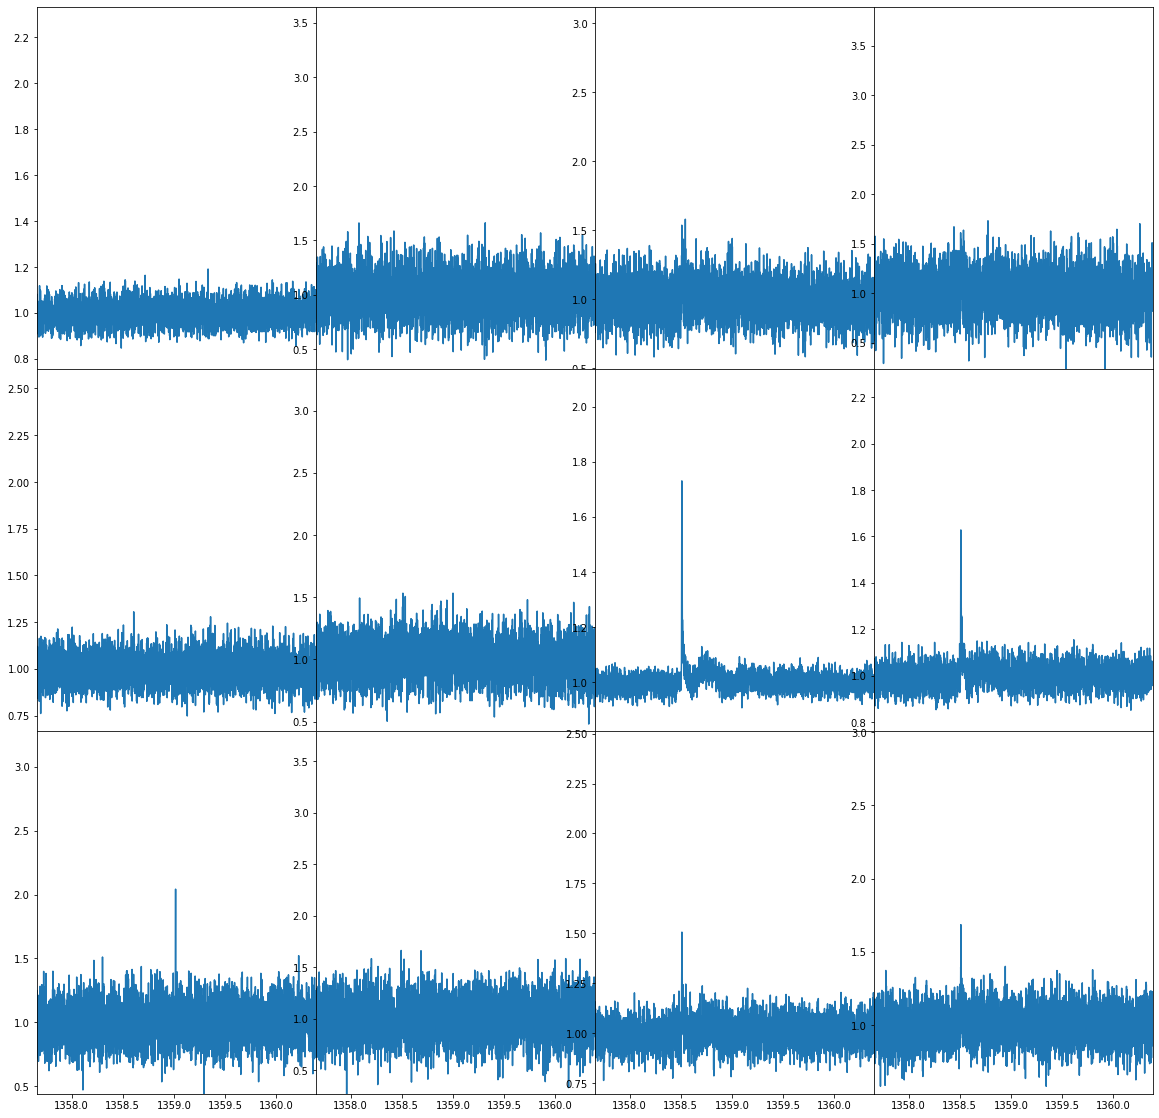

In [44]:
fig, ax = plt.subplots(nrows=3,ncols=4, figsize=(20,20), sharex=True)

for p in paths:
    i, j = p.split("/")[-1].split("_")[0]
    i, j = int(i), int(j)
    #i = 4-int(p[0])+1
    #j = int(p[1])
    flc = search.open(p).get_lightcurve("FLUX")
    flc = FlareLightCurve(time=flc.time, flux=flc.flux, 
                      flux_err=flc.flux_err, cadenceno=flc.cadenceno, targetid=flc.targetid)

    #flcd = custom_detrending(flc)
    #ax[i][j].plot(flcd.time,flcd.detrended_flux/np.nanmedian(flcd.detrended_flux))
    ax[i][j].plot(flc.time,flc.flux/np.nanmedian(flc.flux))
    ax[i][j].set_xlim(flc.time[0],flc.time[-1])
    #rel = np.nanmean(flcd.detrended_flux_err / flcd.detrended_flux)
    rel = np.nanmean(flc.flux_err / flc.flux)
    ax[i][j].set_ylim(.9-3*rel,1.9 + 9*rel)
    
plt.subplots_adjust(hspace=0.,wspace=0)
plt.savefig(f"/work1/eilin/MultiperiodFlares/MalachiteMountains/analysis/plots/{TIC}_pixelwise_lcs.png",dpi=300)